In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import cv2
import statsmodels.api as sm
import scipy

/Users/Torgeir/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/Torgeir/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#from sklearn.linear_model import LinearRegression

In [2]:
num_train_images = 100
num_test_images = 10

In [3]:
np.random.seed(0)

In [4]:
# parameters
n = (100,100) # size of grid
R = 40    # degree of continuity
 
## code
xx,yy = np.meshgrid(np.arange(0,n[0],1)-n[0]//2,np.arange(0,n[1],1)-n[1]//2)
C = np.exp(-3*np.sqrt(xx*xx+yy*yy)/R)
fftC = np.fft.fft2(C)

dataset = np.empty((0,100,100))
for i in range(num_train_images):
    fftN = np.fft.fft2(np.random.normal(size=n))
    sample = np.real(np.fft.ifft2(np.sqrt(np.abs(fftC))*fftN))
    dataset = np.concatenate((dataset, np.expand_dims(sample, axis=0)), axis=0)
 
dataset = (dataset-np.min(dataset))/(np.max(dataset)-np.min(dataset))
 
# plotting
#plt.imshow(sample)
#plt.colorbar()


In [5]:
test_dataset = np.empty((0,100,100))
for i in range(num_test_images):
    fftN = np.fft.fft2(np.random.normal(size=n))
    sample = np.real(np.fft.ifft2(np.sqrt(np.abs(fftC))*fftN))
    test_dataset = np.concatenate((test_dataset, np.expand_dims(sample, axis=0)), axis=0)
test_dataset = (test_dataset-np.min(test_dataset))/(np.max(test_dataset)-np.min(test_dataset))

In [6]:
def blur_image(dataset, kernel_size):
    im_shape = dataset.shape[1:]
    blur_kernel = np.ones(kernel_size)/(kernel_size[0]*kernel_size[1])
    blurred_dataset = np.empty((0,dataset.shape[1],dataset.shape[2]))
    for i in range(dataset.shape[0]):
        blurred_im = scipy.signal.correlate2d(dataset[i], blur_kernel, mode='same', boundary='fill', fillvalue=0) +  np.random.normal(0.0, 0.01, (100,100))# (np.random.random((100,100))-0.5)/20
        blurred_dataset = np.concatenate((blurred_dataset, np.expand_dims(blurred_im, axis=0)), axis=0)

    return blurred_dataset

In [7]:
blurred_images = blur_image(dataset, (5,5))


In [8]:
blurred_images_test =  blur_image(test_dataset, (5,5))

In [9]:
#dataset2 = np.pad(dataset,((0,0),(7,7),(7,7)), mode='constant', constant_values=0.5)
#test_dataset2 = np.pad(test_dataset,((0,0),(7,7),(7,7)), mode='constant', constant_values=0.5)

In [10]:
#blurred_images2 = np.pad(blurred_images,((0,0),(7,7),(7,7)), mode='constant', constant_values=0.5)
#blurred_images_test2 = np.pad(blurred_images_test,((0,0),(7,7),(7,7)), mode='constant', constant_values=0.5)

In [11]:
blurred_images.shape

(100, 100, 100)

In [122]:
#plt.imshow(dataset[0])
#plt.colorbar()

In [123]:
#plt.imshow(blurred_images[0])
#plt.colorbar()

In [140]:
#randomSeed = np.real(np.fft.ifft2( np.fft.fft2(np.random.rand(100,100)) / np.sqrt(fftC)))

In [142]:
#plt.imshow(randomSeed)
#plt.colorbar()

In [ ]:
#randomSeed = np.real(np.fft.ifft2( np.fft.fft2(sample) / np.sqrt(fftC)))

In [14]:
big_gma_h, big_gma_w = (7,7)

In [15]:
def create_nbh_and_blur(ims, blurred_ims, nbh_size,blur_size):
    m, n = nbh_size
    h, w = blur_size
    h = h//2
    w = w//2
    train_dat = []
    blur_dat = []
    #train_dat = np.empty((70,0))
    for im, bl_im in zip(ims,blurred_ims):
        #print(im.shape)
        for i in range(big_gma_h, ims.shape[1]-big_gma_h):
            for j in range(big_gma_w, ims.shape[2]-big_gma_w):
        #for i in range(5, 105):
                #for j in range(5, 105):
                        
                    neighborhood = im[i+1-m:i+1,j-n:(j+n+1)]
                    flat_n = neighborhood.flatten()
                    blur_nbh = bl_im[i-h:i+h+1, j-w:j+w+1]
                    blur_nbh_flat = blur_nbh.flatten()[:]
                    dlt = n
                        
                    nbh_ij = flat_n[:-(dlt)]
                    #nbh_and_blur = np.concatenate((nbh_ij,blur_nbh_flat),axis = 0)
                    #print(nbh_and_blur.shape)
                    #train_dat.append(np.reshape(nbh_and_blur,(-1,1)))
                    train_dat.append(nbh_ij)
                    blur_dat.append(blur_nbh_flat)
                    #nbh_and_blur =  np.reshape(nbh_and_blur,(-1,1))
                    #print(nbh_and_blur.shape)
                    #train_dat = np.concatenate((train_dat, nbh_and_blur),axis=1)
    train_dat = np.array(train_dat)
    blur_dat = np.array(blur_dat)
    #nbh_and_blur = np.concatenate((train_dat,blur_dat),axis=1)
    nbh_and_blur = np.concatenate((blur_dat, train_dat),axis=1)
    return np.array(np.concatenate((np.ones((nbh_and_blur.shape[0],1)),nbh_and_blur),axis=1))



In [16]:
neighborhood_data = create_nbh_and_blur(ims=dataset, blurred_ims=blurred_images, nbh_size=(7,7), blur_size=(5,5))
np.array(neighborhood_data).shape

(739600, 124)

In [14]:
#X_T_X = neighborhood_data[:,:-1].T@neighborhood_data[:,:-1]
#eigval =np.linalg.eigvals(X_T_X)
#vals, eigvec =np.linalg.eig(X_T_X)
#plt.plot(eigvec[:,0])
#plt.plot(eigval[10:])
#plt.grid()

In [17]:
def lin_reg(train_dat):
    model = sm.OLS(train_dat[:,-1], train_dat[:,:-1])
    results = model.fit()
    betas = results.params
    
    y_pred = train_dat[:,1:-1]@betas[1:] + betas[0] 
    
    y_true = train_dat[:,-1]
    sigma2_hat = np.mean((y_true - y_pred)**2)

    return betas, sigma2_hat



In [18]:
parameters_estimate = lin_reg(neighborhood_data)

In [22]:
#parameters_estimate

In [19]:
parameters_estimate[0][0]
#neighborhood_data[:,1]

-0.00011756109931796967

In [20]:
parameters_estimate[1]

0.0007438341500689392

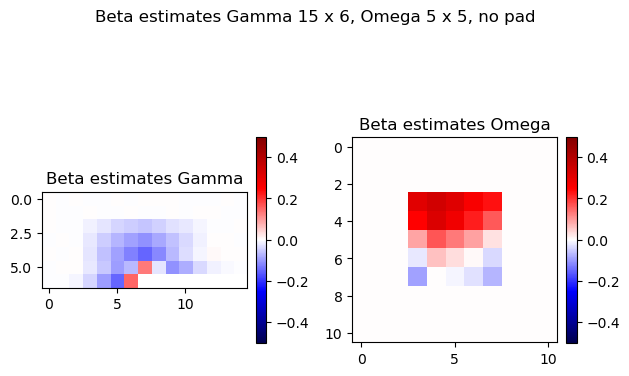

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)#,figsize=(12, 4))

im = axes.flat[0].imshow(np.concatenate((parameters_estimate[0][26:],np.array([np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]))).reshape((7,15)),cmap='seismic',vmin=-0.5, vmax=0.5)
plt.colorbar(im, ax=axes[0],fraction=0.046, pad=0.04)
axes[0].set_title("Beta estimates Gamma")

im = axes.flat[1].imshow(np.pad(parameters_estimate[0][1:26].reshape((5,5)), (3, 3), 'constant'),cmap='seismic',vmin=-0.5, vmax=0.5)
plt.colorbar(im, ax=axes[1],fraction=0.046, pad=0.04)
axes[1].set_title("Beta estimates Omega")

fig.tight_layout()
fig.suptitle('Beta estimates Gamma 15 x 6, Omega 5 x 5, no pad')
plt.savefig('beta_figures_no_pad/no_pad_beta_Gma15_Omg_5.jpg')
#plt.savefig('beta_figures/beta_Gma15_Omg_5.jpg')

In [27]:
#plt.imshow(np.concatenate((parameters_estimate[0][26:],np.array([np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]))).reshape((7,15)))#,vmin=0)
#plt.colorbar()
#plt.title("Beta estimates Gamma 15 x 6")

#plt.savefig('beta_figures/gamma_beta_Gma15_Omg_5.jpg')

In [28]:
#plt.imshow(parameters_estimate[0][1:26].reshape((5,5)))#,vmin=0)
#plt.colorbar()
#plt.title("Beta estimates Omega 5 x 5")
#plt.savefig('../figures_blur/GRF_beta_est_blur.jpg')
#plt.savefig('beta_figures/omega_beta_Gma15_Omg_11.jpg')

In [ ]:
np.sqrt(0.0010763107149353594)

In [20]:
def seq_sim(blurred_im, params, nbh_size, blur_size):
    betas, sigma2 = params
    #new_im = np.zeros(im_shape)
    #new_im = dataset[4]
    #new_im_sample = blurred_im.copy()
    new_im_sample = np.zeros((110,110))
    #pred_im = blurred_im.copy()
    bl_im = blurred_im.copy()
    m, n = nbh_size
    h, w = blur_size
    h = h//2
    w = w//2
    #for i in range(5, blurred_im.shape[0]-h):
    for i in range(5, 105):

        #for j in range(n, blurred_im.shape[1]-n):
        for j in range(5, 105):

            #neighborhood = new_im[i-m:i,j-n:j+n+1]
            neighborhood = new_im_sample[(i+1-m):i+1,(j-n):(j+n+1)]
            blur_nbh = bl_im[i-h:i+h+1, j-w:j+w+1]
            flat_n = neighborhood.flatten()
            blur_nbh_flat = blur_nbh.flatten()[:]
            dlt = n

            #nbh_ij = flat_n[:-(dlt+1)]
            nbh_ij = flat_n[:-(dlt)]
            #mu_pred = np.dot(betas[:],nbh_ij)
            nbh_and_blur = np.concatenate((blur_nbh_flat,nbh_ij[:-1]))
            #mu_pred = nbh_ij[:-1]@betas[1:]+betas[0]
            mu_pred = nbh_and_blur@betas[1:]+betas[0]

            sample = np.random.normal(mu_pred, np.sqrt(sigma2))
            #pred = mu_pred

            new_im_sample[i,j] = sample
            #pred_im[i,j] = pred

    return new_im_sample[m:-m, n:-n]   #pred_im #

In [35]:
seq_sim_sample = seq_sim(blurred_images_test2[2],parameters_estimate, (5,5),blur_size=(5,5))

In [ ]:
seq_sim_sample2 = seq_sim(test_dataset[8],parameters_estimate, (5,5))

In [ ]:
seq_sim_sample3 = seq_sim(np.random.random((100,100)),parameters_estimate, (5,5))

In [ ]:
seq_sim_pred = seq_sim(test_dataset[7],parameters_estimate, (5,5))

In [37]:
seq_sim_sample.shape

(100, 100)

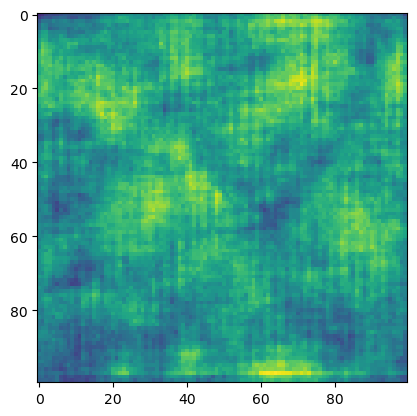

In [36]:
plt.imshow(seq_sim_sample, vmin=0,vmax=1)

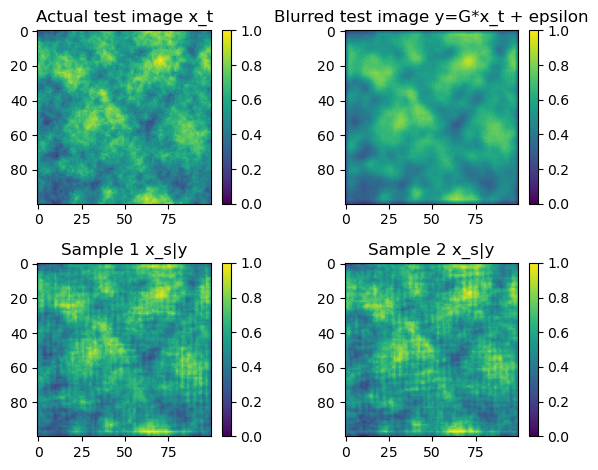

In [39]:
seq_sim_sample = seq_sim(blurred_images_test2[2],parameters_estimate, (5,5),blur_size=(5,5))
seq_sim_sample_1 = seq_sim(blurred_images_test2[2],parameters_estimate, (5,5),blur_size=(5,5))

fig, axes = plt.subplots(nrows=2, ncols=2)

im = axes.flat[0].imshow(test_dataset[2], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,0],fraction=0.046, pad=0.04)
axes[0,0].set_title("Actual test image x_t")

im = axes.flat[1].imshow(blurred_images_test[2], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,1],fraction=0.046, pad=0.04)
axes[0,1].set_title("Blurred test image y=G*x_t + epsilon")

im = axes.flat[2].imshow(seq_sim_sample, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,0],fraction=0.046, pad=0.04)
axes[1,0].set_title("Sample 1 x_s|y")

im = axes.flat[3].imshow(seq_sim_sample_1, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,1],fraction=0.046, pad=0.04)
axes[1,1].set_title("Sample 2 x_s|y")


fig.tight_layout()
#fig.set_figheight(8)
#fig.set_figwidth(6)
plt.savefig('../figures_blur/GRF_sample_blur_1.jpg')
plt.show()

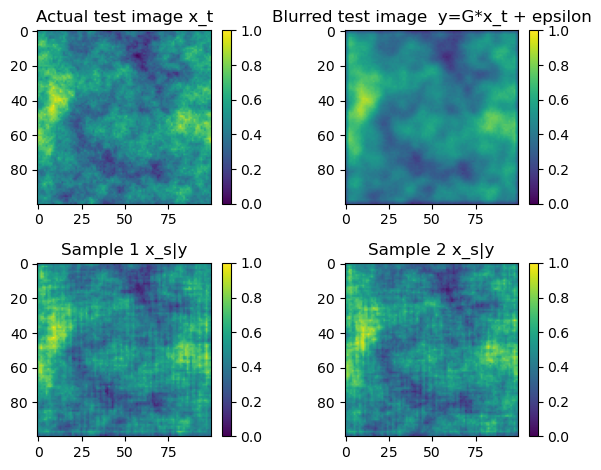

In [40]:
seq_sim_sample = seq_sim(blurred_images_test2[8],parameters_estimate, (5,5),blur_size=(5,5))
seq_sim_sample_1 = seq_sim(blurred_images_test2[8],parameters_estimate, (5,5),blur_size=(5,5))

fig, axes = plt.subplots(nrows=2, ncols=2)

im = axes.flat[0].imshow(test_dataset[8], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,0],fraction=0.046, pad=0.04)
axes[0,0].set_title("Actual test image x_t")

im = axes.flat[1].imshow(blurred_images_test[8], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,1],fraction=0.046, pad=0.04)
axes[0,1].set_title("Blurred test image  y=G*x_t + epsilon")

im = axes.flat[2].imshow(seq_sim_sample, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,0],fraction=0.046, pad=0.04)
axes[1,0].set_title("Sample 1 x_s|y")

im = axes.flat[3].imshow(seq_sim_sample_1, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,1],fraction=0.046, pad=0.04)
axes[1,1].set_title("Sample 2 x_s|y")

"""

fig.set_figheight(8)
fig.set_figwidth(6)
"""
fig.tight_layout()
plt.savefig('../figures_blur/GRF_sample_blur_2.jpg')
plt.show()

In [170]:
#plt.imshow(np.abs(test_dataset[8]-seq_sim_sample))#,vmin=0,vmax=1)
#plt.colorbar()

In [ ]:
#sample 100 images and plot x_t - E(x_s), and var(x_s)

In [22]:
def blur_image_no_noise(dataset, kernel_size):
    im_shape = dataset.shape[1:]
    blur_kernel = np.ones(kernel_size)/(kernel_size[0]*kernel_size[1])
    blurred_dataset = np.empty((0,dataset.shape[1],dataset.shape[2]))
    for i in range(dataset.shape[0]):
        blurred_im = scipy.signal.correlate2d(dataset[i], blur_kernel, mode='same', boundary='fill', fillvalue=0) #+  np.random.normal(0.0, 0.01, (100,100))# (np.random.random((100,100))-0.5)/20
        blurred_dataset = np.concatenate((blurred_dataset, np.expand_dims(blurred_im, axis=0)), axis=0)

    return blurred_dataset

In [21]:
def y_minus_GX_samp(y,X_samp,num_samples):
    nnn = (y - blur_image_no_noise(X_samp, (5,5)))
    return nnn

In [44]:
X_sampled = np.expand_dims(seq_sim(blurred_images_test2[8],parameters_estimate, (5,5),blur_size=(5,5)),axis=0)
#y_min_G_Xs = y_minus_GX_samp(blurred_images_test[8], np.expand_dims(seq_sim(blurred_images_test[8],parameters_estimate, (5,5),blur_size=(5,5)),axis=0), 1)
y_min_G_Xs = y_minus_GX_samp(blurred_images_test[8], X_sampled, 1)
G_X_sampled = blur_image_no_noise(X_sampled, (5,5))

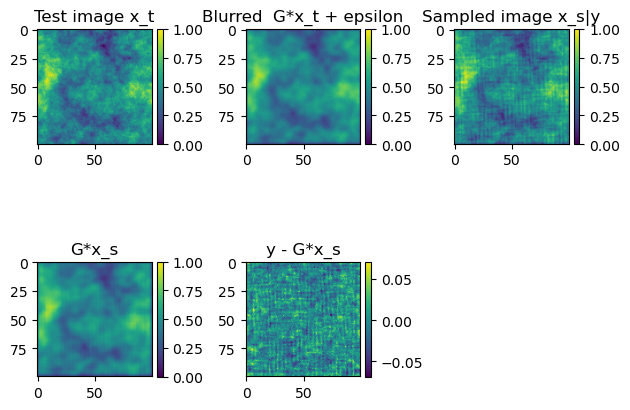

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=3)


im = axes.flat[0].imshow(test_dataset[8], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,0],fraction=0.046, pad=0.04)
axes[0,0].set_title("Test image x_t")

im = axes.flat[1].imshow(blurred_images_test[8], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,1],fraction=0.046, pad=0.04)
axes[0,1].set_title("Blurred  G*x_t + epsilon")

im = axes.flat[2].imshow(X_sampled[0], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,2],fraction=0.046, pad=0.04)
axes[0,2].set_title("Sampled image x_s|y")


im = axes.flat[3].imshow(G_X_sampled[0], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,0],fraction=0.046, pad=0.04)
axes[1,0].set_title("G*x_s")

im = axes.flat[4].imshow(y_min_G_Xs[0])#[0,5:97,5:95])#, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,1],fraction=0.046, pad=0.04)
axes[1,1].set_title("y - G*x_s")

axes[1,2].set_visible(False)
fig.tight_layout()

plt.savefig('../figures_blur/CRF_y_min_GX_s_1.jpg')



In [20]:
def sample_many_ims(blurred_im,num_samples, nbh_size):
    m,n = nbh_size
    blurred_samples = np.empty((0,blurred_im.shape[0]-m*2,blurred_im.shape[1]-n*2))

    for i in range(num_samples):
        sample = seq_sim(blurred_im,parameters_estimate, (5,5),blur_size=(5,5))
        blurred_samples = np.concatenate((blurred_samples, np.expand_dims(sample, axis=0)), axis=0)
    return blurred_samples
        

In [51]:
many_samples = sample_many_ims(blurred_im=blurred_images_test2[8],num_samples=100,nbh_size=(5,5))

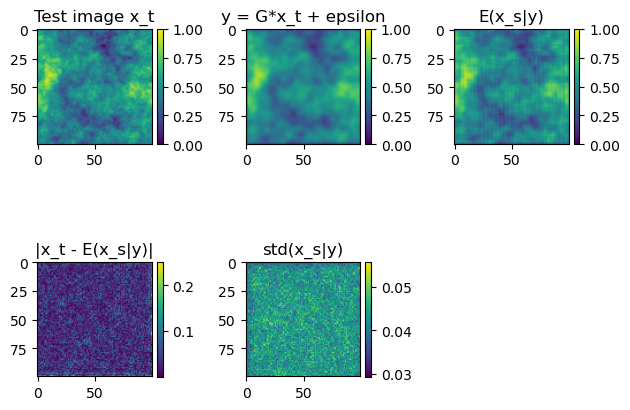

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=3)

im = axes.flat[0].imshow(test_dataset[8], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,0],fraction=0.046, pad=0.04)
axes[0,0].set_title("Test image x_t")

im = axes.flat[1].imshow(blurred_images_test[8], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,1],fraction=0.046, pad=0.04)
axes[0,1].set_title("y = G*x_t + epsilon")

im = axes.flat[2].imshow(np.mean(many_samples, axis=0), vmin=0, vmax=1)#[0,5:97,5:95])#, vmin=0, vmax=1)[:,5:97,5:95]
plt.colorbar(im, ax=axes[0,2],fraction=0.046, pad=0.04)
axes[0,2].set_title("E(x_s|y)")

im = axes.flat[3].imshow(np.abs(test_dataset[8]-np.mean(many_samples, axis=0)))#[0,5:97,5:95])#, vmin=0, vmax=1)[:,5:97,5:95][8,5:97,5:95]
plt.colorbar(im, ax=axes[1,0],fraction=0.046, pad=0.04)
axes[1,0].set_title("|x_t - E(x_s|y)|")

im = axes.flat[4].imshow(np.std(many_samples, axis=0))#[5:97,5:95])#[0,5:97,5:95])#, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,1],fraction=0.046, pad=0.04)
axes[1,1].set_title("std(x_s|y)")

axes[1,2].set_visible(False)

fig.tight_layout()

plt.savefig('../figures_blur/GRF_posterior_sample1.jpg')


In [17]:
import scipy.stats

In [18]:
def blur_image_no_noise2(image, kernel_size):
    #im_shape = dataset.shape[1:]
    blur_kernel = np.ones(kernel_size)/(kernel_size[0]*kernel_size[1])
    #blurred_dataset = np.empty((0,dataset.shape[0],dataset.shape[1]))
    #for i in range(dataset.shape[0]):
    blurred_im = scipy.signal.correlate2d(image, blur_kernel, mode='same', boundary='fill', fillvalue=0) #+  np.random.normal(0.0, 0.01, (100,100))# (np.random.random((100,100))-0.5)/20
    #blurred_dataset = np.concatenate((blurred_dataset, np.expand_dims(blurred_im, axis=0)), axis=0)

    return blurred_im# blurred_dataset

In [19]:
def evaluate_bayes_post(unblurred_im, eps_std, fftC, blurred_im, blur_size, gamma_size):
    loglik_prior = 0
    loglik_likelihood = 0
    m, n = gamma_size
    
    prior_eval = np.real(np.fft.ifft2( np.fft.fft2(unblurred_im) / np.sqrt(fftC)))
    y_true = blurred_im[m:-m,n:-n].copy()
    #G_xs = blur_image_no_noise2(unblurred_im, blur_size)
    blur_kernel = np.ones(blur_size)/(blur_size[0]*blur_size[1])
    G_xs = scipy.signal.correlate2d(unblurred_im, blur_kernel, mode='same', boundary='fill', fillvalue=0)
    
    likelihood_prob = scipy.stats.norm.pdf(y_true, G_xs, eps_std)
    likelihood_prob =  np.clip(likelihood_prob, 0.0000000000001,None)
    
    prior_prob = scipy.stats.norm.pdf(prior_eval, 0, 1)
    prior_prob = np.clip(prior_prob, 0.0000000000001,None)

    loglik_prior = np.sum(np.log(prior_prob))
    loglik_likelihood = np.sum(np.log(likelihood_prob))

    return loglik_prior + loglik_likelihood

In [27]:
def evaluate_direct_post(parameters_estimate, blurred_im, gamma_size, omega_size):
    m, n = gamma_size
    h, w = omega_size
    h = h//2
    w = w//2
    
    total_log_likelihood = 0
    im_size = blurred_im.shape
    blur_im = blurred_im.copy()
    sample_im = np.zeros(im_size)
    
    betas, var_est = parameters_estimate
    
    #sample_im =
    for i in range(m, im_size[0]-m):
        for j in range(n, im_size[1]-n):
            neighborhood = sample_im[(i+1-m):i+1,(j-n):(j+n+1)]
            blur_nbh = blur_im[i-h:i+h+1, j-w:j+w+1]
            flat_n = neighborhood.flatten()
            blur_nbh_flat = blur_nbh.flatten()[:]
            dlt = n


            nbh_ij = flat_n[:-(dlt)]
            nbh_and_blur = np.concatenate((blur_nbh_flat,nbh_ij[:-1]))
            mu_pred = nbh_and_blur@betas[1:]+betas[0]

            sample = np.random.normal(mu_pred, np.sqrt(var_est))
            sample_im[i,j] = sample
            x_true = sample

            prob = scipy.stats.norm.pdf(x_true, mu_pred, np.sqrt(var_est))

            log_likelihood = np.log(prob)
    
            
            total_log_likelihood += log_likelihood


    return total_log_likelihood, sample_im[m:-m,n:-n]

In [28]:
def importance_sampling(likelihoods, num_ims):
    bayes_loglik = likelihoods[:,1]
    direct_loglik = likelihoods[:,0]
    log_weights = np.zeros((num_ims,))
    for im in range(num_ims):
        log_weights[im] = bayes_loglik[im]-direct_loglik[im]
    log_weights = log_weights - np.max(log_weights)
    weights = np.exp(log_weights)/np.sum(np.exp(log_weights))
    #n_eff
    #E(x_s|y) = weighta*mean(x_s|y)

    return weights

In [29]:
def compare_direct_posterior(num_samples, im, gamma_size, omega_size, eps_std, blur_size):
    comparison = np.zeros((num_samples,2))
    for i in range(num_samples):
        comparison[i,0], unblr_im = evaluate_direct_post(parameters_estimate, im, gamma_size, omega_size)
        #unbl_im , _, _, _, _, _ = gen_im_mix(mlp_mix, blurred_testset[im,0], (5,5), (5,5))
        comparison[i,1] = evaluate_bayes_post(unblr_im, eps_std, fftC, im, blur_size, gamma_size)

    return comparison

In [30]:
def imp_samp_EX(im, num_samples, gamma_size, omega_size, eps_std, blur_size):
    #many_samples = sample_many_ims(blurred_im=blurred_testset[im,0],num_samples=num_samples)
    np.random.seed(0)
    #many_samples = sample_many_ims(blurred_im=torch.unsqueeze(blurred_testset[im], dim=0),num_samples=num_samples)
    many_samples = sample_many_ims(im, num_samples, gamma_size) #gen_im_mix_many_ims(pixel_cnn, (28,28), (5,5), torch.unsqueeze(blurred_testset[im],dim=0), (5,5), num_samples)
    #bayes_posterior = 
    log_likelihoods = compare_direct_posterior(num_samples, im, gamma_size, omega_size, eps_std, blur_size)
    weights = importance_sampling(log_likelihoods, num_samples)
    #weighted_ims = many_samples*weights
    weighted_ims = np.einsum('ijk,i->ijk',many_samples,weights)

    expected_ims = np.sum(weighted_ims,axis=0)
    #std_ims = np.std(weighted_ims, axis=0)
    std_ims = np.sqrt(np.sum(np.einsum('ijk,i->ijk',(many_samples-expected_ims)**2, weights),axis=0))
    n_eff = 1/np.sum(weights**2)
    return expected_ims, std_ims, n_eff, many_samples

In [31]:
E_xs_IS, std_xs_IS, N_eff_is, E_xs = imp_samp_EX(im=blurred_images_test2[3], num_samples=200, gamma_size=(5,5), omega_size=(5,5), eps_std=0.01, blur_size=(5,5))

In [32]:
N_eff_is

1.0

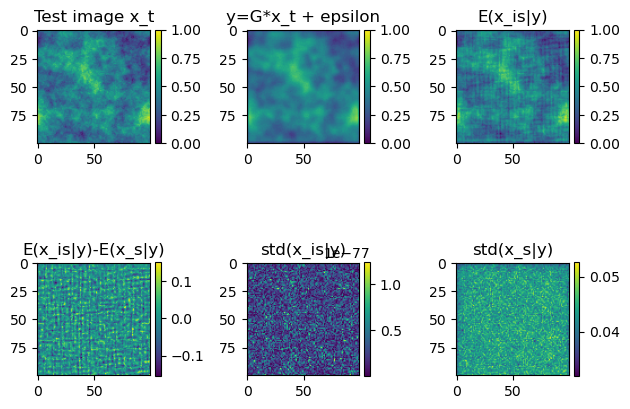

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=3)

im = axes.flat[0].imshow(test_dataset[3], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,0],fraction=0.046, pad=0.04)
axes[0,0].set_title("Test image x_t")

im = axes.flat[1].imshow(blurred_images_test[3], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,1],fraction=0.046, pad=0.04)
axes[0,1].set_title("y=G*x_t + epsilon")

im = axes.flat[2].imshow(E_xs_IS,vmin=0, vmax=1,)#[0,5:97,5:95])#, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,2],fraction=0.046, pad=0.04)
axes[0,2].set_title("E(x_is|y)")


im = axes.flat[3].imshow(E_xs_IS-np.mean(E_xs,axis=0))#, vmin=0, vmax=1,)#[0,5:97,5:95])#, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,0],fraction=0.046, pad=0.04)
axes[1,0].set_title("E(x_is|y)-E(x_s|y)")


im = axes.flat[4].imshow(std_xs_IS)#, vmin=0, vmax=1,)#[0,5:97,5:95])#, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,1],fraction=0.046, pad=0.04)
axes[1,1].set_title("std(x_is|y)")


im = axes.flat[5].imshow(np.std(E_xs, axis=0))#, vmin=0, vmax=1,)#[0,5:97,5:95])#, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,2],fraction=0.046, pad=0.04)
axes[1,2].set_title("std(x_s|y)")


fig.tight_layout()

In [34]:
def chi_square(eps_std, num_samples, im, nbh_size):
    np.random.seed(0)
    m,n = nbh_size
    many_samples = sample_many_ims(blurred_images_test2[im],num_samples, nbh_size)
    blurred_many_samples = blur_image_no_noise(many_samples, (5,5))
    squared_residuals = (blurred_many_samples-blurred_images_test2[im,m:-m,n:-n])**2
    standard_residuals = squared_residuals/(eps_std**2)
    chi_square_res = np.sum(standard_residuals, axis=(1,2))
    return chi_square_res

In [35]:
chi_square1 = chi_square(0.01, 200, 7, (5,5))

In [36]:

#plt.hist(chi_square1, bins=30, density=True,label='histogram')
#x = np.arange(7000, 15000, 1)
#df = 100*100
#plt.plot(x, scipy.stats.chi2.pdf(x, df), label='Chi-square pdf, p=8100')
#plt.legend()
#plt.ylabel('probability')
#plt.savefig('../figures_blur/linreg_Chi_square_2.jpg')


In [37]:
chi_square2 = chi_square(0.01, 200, 3, (5,5))

In [44]:
np.var(chi_square2)

1625435.9327855762

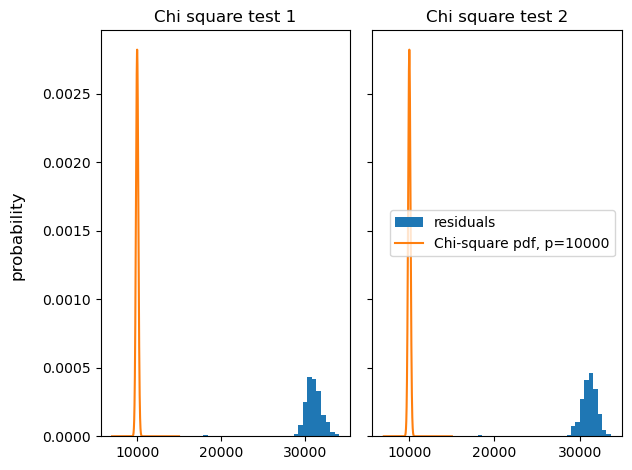

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
x = np.arange(7000, 15000, 1)
df = 100*100

im = axes.flat[0].hist(chi_square1, bins=30, density=True,label='residuals')
im = axes.flat[0].plot(x, scipy.stats.chi2.pdf(x, df), label='Chi-square pdf, p=10000')
axes[0].set_title("Chi square test 1")

im = axes.flat[1].hist(chi_square2, bins=30, density=True,label='residuals')
im = axes.flat[1].plot(x, scipy.stats.chi2.pdf(x, df), label='Chi-square pdf, p=10000')
axes[1].set_title("Chi square test 2")
axes[1].legend()

fig.supylabel('probability')
fig.tight_layout()

#plt.savefig('../figures_blur/linreg_Chi_square_both.jpg')


In [111]:
"""
plt.hist(chi_square2, bins=30, density=True,label='histogram')
x = np.arange(7000, 12000, 1)
df = 90*90
plt.plot(x, scipy.stats.chi2.pdf(x, df), label='Chi-square pdf, p=8100')
plt.legend()
plt.ylabel('probability')
plt.savefig('../figures_blur/linreg_Chi_square_2.jpg')
"""
print('jjsjsjs')

jjsjsjs


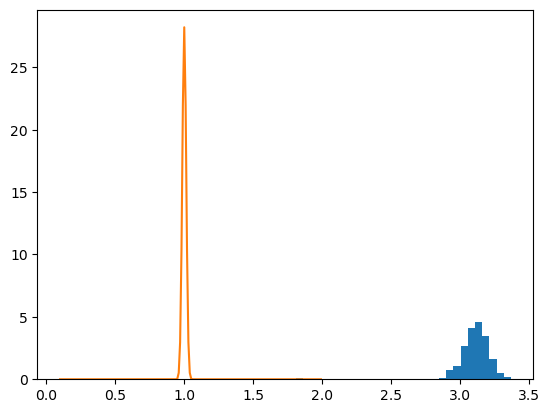

In [91]:

plt.hist(chi_square2/10000, bins=30, density=True,label='histogram')
x = np.arange(0.1, 2, 0.01)

plt.plot(x, scipy.stats.norm.pdf(x,1,np.sqrt(2*10000)/10000), label='Chi-square pdf, p=8100')

In [28]:
def AIC(parameters_estimate, dataset, blur_dataset):
    betas, sigma2 = parameters_estimate
    test_data = create_nbh_and_blur(ims=dataset, blurred_ims=blur_dataset, nbh_size=(7,7), blur_size=(5,5))

    x_pred = test_data[:,1:-1]@betas[1:] + betas[0] 
    
    x_true = test_data[:,-1]

    aic_score = -2*scipy.stats.norm.logpdf(x_true, x_pred, np.sqrt(sigma2)).sum() + 2*len(betas) 
    logL = scipy.stats.norm.logpdf(x_true, x_pred, np.sqrt(sigma2)).sum()


    return aic_score, logL, parameters_estimate[1]

In [31]:
aic = AIC(parameters_estimate, dataset, blurred_images)

In [32]:
aic

(-3228711.0684683654, 1614478.5342341827, 0.0007438341500689392)